<h1>Práctica REDES NEURONALES</h1>

<p align="center">
Esta práctica consiste en la configuración de una red neuronal para realizar un entrenamiento de clasificación de un conjunto de imágenes divido en 5 clases o categorias correspondientes a muebles. Durante los siguientes pasos veremos el avance del entrenamiento además de las comprobaciones que consideramos pertinentes.
</p>
<p align="center">
En nuestro un equipo con la siguiente configuración:
    <ul>
        <li>CPU -> i7-10870H</li>
        <li>GPU -> RTX3070</li>
        <li>RAM -> 32GBbs</li>
    </ul>  
</p>

<p align="center">
El dataset se compone de 4024 imágenes de entrenamiento y 518 de test divididas en 5 categorias:
    <ul>
        <li>bed</li>
        <li>chair</li>
        <li>sofa</li>
        <li>swivelchair</li>
        <li>table</li>
    </ul>  
</p>

--------------------------------------------------------------------------------------------------
<h2>Comprobación de funcionamiento de la GPU</h2>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

--------------------------------------------------------------------------------------------------
<h2>Comprobación que tenemos acceso al dataset</h2>

In [7]:
ls "./Desktop/RedesNeuronales/images"

 El volumen de la unidad C es Windows
 El número de serie del volumen es: BE92-0ACF

 Directorio de C:\Users\carlo\Desktop\RedesNeuronales\images

09/06/2021  15:32    <DIR>          .
09/06/2021  15:32    <DIR>          ..
09/06/2021  15:32    <DIR>          test
09/06/2021  15:32    <DIR>          train
               0 archivos              0 bytes
               4 dirs  275.223.777.280 bytes libres


----------------------------------------------------------------
<h2>Tranfer learning</h2>

Para intentar mejorar el nivel de acierto de nuestra red neuronal hemos decido aplicar la técnica de Transfer Learning que consiste en utilizar un modelo pre-entrenado que nos permitiría aprovechar la potencia de una red entrenada con un volumen de datos mayor y una configuración superior a la nuestra.

Un modelo pre-entrenado es un modelo que fue entrenado con un ingente conjunto de datos de referencia para resolver un problema similar al que queremos abordar. Debido al coste computacional del entrenamiento de tales modelos, así como en la complejidad a la hora de elegir la arquitectura óptima, el Transfer Learning de modelos bien conocidos y precisos se ha convertido es una práctica común (por ejemplo, VGG-16, VGG-19, ResNet-50, SeNet-50, etc.)



In [44]:
# IMPORT KERAS
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
import tensorflow.keras
from time import time

print("End Import keras")

End Import keras


---
<h3>Cargar Dataset</h3>

In [45]:
# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = './Desktop/RedesNeuronales/images/train'
validation_data_dir = './Desktop/RedesNeuronales/images/test'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.1
)

validation_datagen = ImageDataGenerator(
        rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

print("End Data source")

Found 4024 images belonging to 5 classes.
Found 518 images belonging to 5 classes.
End Data source


---
<h3>Cargar Modelo Preentrenado</h3>

En nuestro caso hemos elegido la Red Convolucional VGG16 como modelo pre-entrenado la cual cuenta con un conjunto de mas de 14 millones de imágenes que pertenecen a 1000 clases.
En el primer paso configuramos el modelo pre-entrenado al tamaño de las imágenes que hemos establecido en nuestro data set y mostramos un sumario para comprobar las distintas capas de la misma.


In [46]:
# MODEL --------------------------------------------------
from tensorflow.keras.applications import VGG16
pre_trained_model = VGG16(input_shape = (150,150,3),
                            include_top = False,
                            weights = 'imagenet')

In [47]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

------------------------------------------------------------------
<h3>Congelar Capas del Modelo Pre-entrenado</h3>

En este paso desactivamos las capas del modelo pre-entrenado para evitar sobre escribir la información de estas al realizar nuestro propio entrenamiento.

In [48]:
for layer in pre_trained_model.layers:
    layer.trainable = False

-----
<h3>Juntar Nuestro Modelo y El Modelo Pre-entrenado</h3>
Agregamos dos capas nuevas fully conected para conectar la salida de las capas congeladas para utilizando las características antiguas conseguir predicciones de nuestro conjunto de datos.


In [49]:
modelFE = tensorflow.keras.models.Sequential([
    pre_trained_model,
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(128, activation='relu'),
    tensorflow.keras.layers.Dense(5, activation='softmax')
])

modelFE.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [50]:
modelFE.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
Total params: 15,764,037
Trainable params: 1,049,349
Non-trainable params: 14,714,688
_________________________________________________________________


---
<h3>Realizar Entrenamiento</h3>

In [51]:
# TRAINING --------------------------------------------------

epochs = 40

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3, restore_best_weights=True)

historyFE = modelFE.fit_generator(
        train_generator,
        validation_data = validation_generator,
        steps_per_epoch=200,
        epochs=epochs,
        callbacks = [es]
)


# SAVING --------------------------------------------------

modelFE.save("modeloFE_CEPB_PVL2.h5")
print("End Save")

C:\Users\carlo\anaconda3\envs\tensorflow25\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
200/200 [==============================] - 31s 153ms/step - loss: 1.8063 - accuracy: 0.2568 - val_loss: 1.6000 - val_accuracy: 0.3166
Epoch 2/40
200/200 [==============================] - 21s 103ms/step - loss: 1.5050 - accuracy: 0.4084 - val_loss: 1.4310 - val_accuracy: 0.3977
Epoch 3/40
200/200 [==============================] - 21s 104ms/step - loss: 1.3489 - accuracy: 0.4987 - val_loss: 1.3332 - val_accuracy: 0.4961
Epoch 4/40
200/200 [==============================] - 20s 102ms/step - loss: 1.2529 - accuracy: 0.5560 - val_loss: 1.2543 - val_accuracy: 0.5521
Epoch 5/40
200/200 [==============================] - 20s 102ms/step - loss: 1.1677 - accuracy: 0.6122 - val_loss: 1.1846 - val_accuracy: 0.5927
Epoch 6/40
200/200 [==============================] - 21s 103ms/step - loss: 1.0958 - accuracy: 0.6501 - val_loss: 1.1217 - val_accuracy: 0.6255
Epoch 7/40
200/200 [==============================] - 21s 104ms/step - loss: 1.0339 - accuracy: 0.6872 - val_loss: 1.0642 - val_ac

---
<h3>Gráfica Transfer Learning</h3>


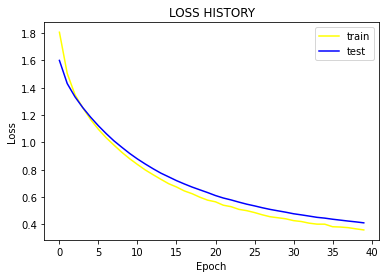

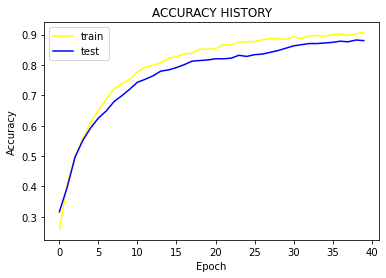

In [52]:
import matplotlib.pyplot as plt

plt.plot(historyFE.history['loss'], color='yellow')
plt.plot(historyFE.history['val_loss'], color='blue')
plt.title('LOSS HISTORY')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(historyFE.history['accuracy'], color='yellow')
plt.plot(historyFE.history['val_accuracy'], color='blue')
plt.title('ACCURACY HISTORY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

---
<h3>Cargar Conjunto de Datos sin Mezclar</h3>

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)


Found 518 images belonging to 5 classes.


---
<h3>Matriz de Confusión Transfer Learning</h3>
Como podemos ver si comparamos los resultados obtenidos por la matriz de confusión del modelo entrenado a través de transfer learning con el modelo básico los resultados mejoran mucho obteniendo algunas confusiones solo en las categorías mas similares y siendo estos muy pocos.

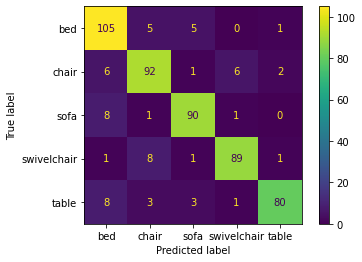

In [37]:
CLASSES = ['bed', 'chair', 'sofa', 'swivelchair', 'table']

model = tensorflow.keras.models.load_model("./modeloFE_CEPB_PVL2.h5")

Y_pred = model.predict(validation_generator, 446)
y_pred =np.argmax(Y_pred, axis=1)

cm = confusion_matrix(validation_generator.classes, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=CLASSES).plot()

---------------------------------------------------------------------------------------
<h3>Matriz de Confusión Modelo Básico</h3>


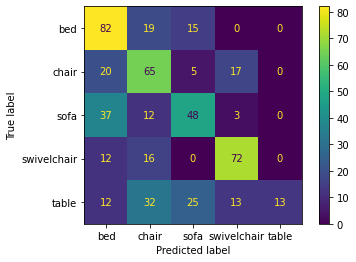

In [38]:
model = tensorflow.keras.models.load_model("./modelo4_CEPB_PVL2.h5")

Y_pred = model.predict(validation_generator, 446)
y_pred =np.argmax(Y_pred, axis=1)

cm = confusion_matrix(validation_generator.classes, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=CLASSES).plot()

--------------------------------------------------------------------------------------------------
<h1>Modelo Básico sin Transfer Learning</h1>
<h2>Importar librerias</h2>

In [10]:
# IMPORT KERAS

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
import tensorflow.keras
from time import time

print("End Import keras")

End Import keras


--------------------------------------------------------------------------------------------------
<h2>Cargar conjunto de entrenamiento</h2>

In [11]:
# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = './Desktop/RedesNeuronales/images/train'
validation_data_dir = './Desktop/RedesNeuronales/images/test'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.1
)

validation_datagen = ImageDataGenerator(
        rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

print("End Data source")

Found 4024 images belonging to 5 classes.
Found 518 images belonging to 5 classes.
End Data source


--------------------------------------------------------------------------------------------------
<h2>Configuracíon de la Red Neuronal</h2>

<p align="center">
Partiendo del modelo inicial que tiene la seguiente configuración, añadiremos alguna capa nueva y modificaremos algunos hiperparametros para buscar un mejor resultado.
</p>

<ul>
    <li>La entrada es un tensor que representa cada pixel de la imagen en código RGB</li>
    <li>Luego tendremos una primera capa convolutiva de 32 filtros</li>
    <li>En la segunda capa convolutiva de 64 filtros extraeremos carácteristicas cada vez mas complejas</li>
    <li>Con maxpooling eliminamos información poco relevante agrupando en regiones y quedandonos con la celda de mayor valor</li>
    <li>Utilizando dropout conseguimos reducir el sobreentrenamiento desactivando de manera aleatoria algunas neuronas durante el entrenamiento
    </li>
    <li>Para terminar en la capa fully conected convertimos el tensor en un vector y lo conectamos con la salida</li>
</ul>

<img src="red_neuronal.PNG" width="750" height="600">


In [12]:
# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print("End Model")

End Model


---------------------------------------------------------------------------
<h1>Sumario</h1>

In [13]:
# MODEL SUMMARY--------------------------------------------------

model.summary()
print("End Summary")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 341056)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               43655296  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

-----------------------------------------------------------------------
<h2>Entrenamiento</h2>

In [14]:
# TRAINING --------------------------------------------------

epochs = 20

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3, restore_best_weights=True)

history = model.fit_generator(
        train_generator,
        steps_per_epoch=200,
        epochs=epochs,
        validation_data = validation_generator,
        callbacks = [es]
)


# SAVING --------------------------------------------------

model.save("modelo4_CEPB_PVL2.h5")
print("End Save")

C:\Users\carlo\anaconda3\envs\tensorflow25\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
200/200 [==============================] - 29s 113ms/step - loss: 1.5204 - accuracy: 0.3504 - val_loss: 1.4802 - val_accuracy: 0.4498
Epoch 2/20
200/200 [==============================] - 20s 99ms/step - loss: 1.4104 - accuracy: 0.4395 - val_loss: 1.4112 - val_accuracy: 0.4305
Epoch 3/20
200/200 [==============================] - 20s 99ms/step - loss: 1.3276 - accuracy: 0.4970 - val_loss: 1.3304 - val_accuracy: 0.4942
Epoch 4/20
200/200 [==============================] - 20s 99ms/step - loss: 1.2811 - accuracy: 0.5053 - val_loss: 1.2869 - val_accuracy: 0.4961
Epoch 5/20
200/200 [==============================] - 20s 98ms/step - loss: 1.2320 - accuracy: 0.5356 - val_loss: 1.2441 - val_accuracy: 0.5405
Epoch 6/20
200/200 [==============================] - 20s 99ms/step - loss: 1.2165 - accuracy: 0.5399 - val_loss: 1.2394 - val_accuracy: 0.5174
Epoch 7/20
200/200 [==============================] - 20s 99ms/step - loss: 1.1753 - accuracy: 0.5560 - val_loss: 1.2055 - val_accuracy

----------------------------------------------------------
<h2>Gráficas del Modelo</h2>

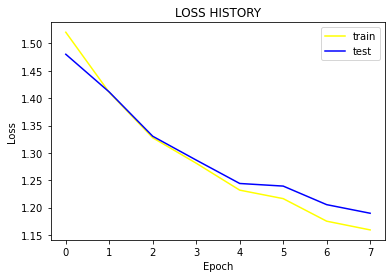

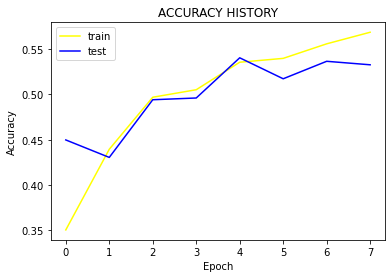

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='yellow')
plt.plot(history.history['val_loss'], color='blue')
plt.title('LOSS HISTORY')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['accuracy'], color='yellow')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('ACCURACY HISTORY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

---------------------------------------------------------------------------------------
<h1>Matriz de confusión</h1>

Para ver mejor el funcionamiento de nuestro modelo final utilizamos una matriz de confusión la cual nos permite ver mejor la relación de los valores resultado de las predicciones con los valores reales, sabiendo así el grado de acierto, de falsos positivos y  falsos negativos.
</br></br>
Como vemos en la matriz de cofusión buscamos que los valores de la esquina superior izquierda sean los mal altos posibles ya que estos definen los verdaderos positivos, lo que quiere decir esto es que la predicción concuerda con el resultado.

Found 518 images belonging to 5 classes.


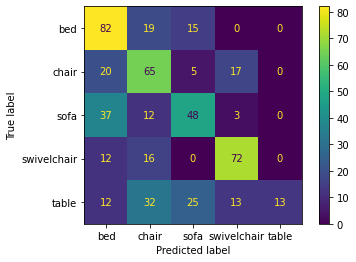

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Y_pred = model.predict(validation_generator, 446)
y_pred =np.argmax(Y_pred, axis=1)

CLASSES = ['bed', 'chair', 'sofa', 'swivelchair', 'table']

cm = confusion_matrix(validation_generator.classes, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=CLASSES).plot()